In [1]:
#using Revise
using DrWatson
@quickactivate "ABoxWorld"
include(srcdir("ABoxWorld.jl"));

┌ Info: ABoxWorld project environment is loaded and active
└ @ Main s:\Sync\University\2023_MRP_2\MRP2_WorkDir\ABoxWorld\src\ABoxWorld.jl:10


In [2]:

using LinearAlgebra
using TensorOperations
using Parameters
using CairoMakie
CairoMakie.activate!()
#using GLMakie
#GLMakie.activate!()


In [3]:

convert_matrixbox_to_nsjoint = wirings.convert_matrixbox_to_nsjoint
convert_nsjoint_to_matrixbox = wirings.convert_nsjoint_to_matrixbox


# Boxes as 2x2x2x2 tensors
MaxMixedBox = nsboxes.reconstructFullJoint(UniformRandomBox((2, 2, 2, 2)))
PR(μ, ν, σ) = nsboxes.reconstructFullJoint(PRBoxesCHSH(;μ=μ, ν=ν, σ=σ))
CanonicalPR = PR(0, 0, 0)
PL(α, γ, β, λ) = nsboxes.reconstructFullJoint(LocalDeterministicBoxesCHSH(;α=α, γ=γ, β=β, λ=λ))
SR = (PL(0,0,0,0) .+ PL(0,1,0,1)) ./ 2
#SR = matrix_to_tensor(non_local_boxes.utils.SR)
#PRprime = matrix_to_tensor(non_local_boxes.utils.PRprime)
#P0 = matrix_to_tensor(non_local_boxes.utils.P_0)
#P1 = matrix_to_tensor(non_local_boxes.utils.P_1)


CHSH_score = games.canonical_CHSH_score
#CHSHprime_score = games.CHSH_score_generator(-1,1,1,1; batched=false)
CHSHprime_score = games.CHSH_score_generator(1,-1,1,1; batched=false)


BoxProduct = wirings.tensorized_boxproduct
reduc_BoxProduct = wirings.reduc_tensorized_boxproduct
BoxProduct_matrices(w::Matrix{<:Real}, matrixbox1::Matrix{Float64}, matrixbox2::Matrix{Float64}) = convert_nsjoint_to_matrixbox(reduc_BoxProduct(w, matrixbox1, matrixbox2))


IC_Bound = Original_IC_Bound()
IC_Bound_LHS(P::Array{Float64, 4}) = conditions.evaluate(IC_Bound, P)
IC_Bound_LHS(W::Matrix{<:Real}, P_mat::Matrix{Float64}, Q_mat::Matrix{Float64}) = games.Original_IC_Bound_score(W, P_mat, Q_mat)
IC_Bound_LHS(W::Vector{<:Real}, P_mat::Matrix{Float64}, Q_mat::Matrix{Float64}) = games.Original_IC_Bound_score(W, P_mat, Q_mat)

IC_MutInfo = games.MutInfo_IC_vanDam_score



MutInfo_IC_vanDam_score (generic function with 5 methods)

In [4]:
include(scriptsdir("WiringsSearch", "WiringsSliceSearch.jl"))

Wirings_Slice_Search (generic function with 1 method)

#### Extremal Wiring Shifts

In [5]:
"""
c_config = WiringsSliceSearchConfig(mode=:greedy_lifting, #:uniform, #
                                box_search_space=:mid_mid_point, #:full_IC_Q_gap, #,# , #
                                Box1=("PR"=>CanonicalPR),
                                Box2=("I"=>MaxMixedBox),
                                Box3=("PL(0,0,0,0)"=>PL(0,0,0,0)),
                                primary_score=CHSH_score,
                                secondary_score=CHSHprime_score,
                                boundary_precision=4e-3,
                                search_precision=5e-2,
                                precision=1.4e-2,
                                max_wiring_order=6,
                                )
    
data_output = Wirings_Slice_Search(c_config; verbose=true)

#data_output, data_filename = produce_or_load(Wirings_Slice_Search, 
#                                            c_config,
#                                            mkpath(datadir("WiringsSliceSearch"));
#                                            verbose=true,
#                                            )
"""
_ = "."

_

In [9]:

CHSHprime_score = games.CHSH_score_generator(-1,1,1,1; batched=false)


c_config = WiringsSliceSearchConfig(mode=:uniform,
                                box_search_space=:full_IC_Q_gap, #:below_IC_boundary,#:point_near_IC_boundary,
                                Box1=("PR"=>CanonicalPR),
                                Box2=("I"=>MaxMixedBox),
                                #Box3=("PR(1,1,0)"=>PR(1,1,0)),
                                #Box3=("PL(0,0,0,0)"=>PL(0,0,0,0)),
                                Box3=("PL(0,1,0,1)"=>PL(0,1,0,1)),
                                primary_score=CHSH_score,
                                secondary_score=CHSHprime_score,
                                IC_violation_criterion = is_NOT_in_IC, 
                                boundary_precision=4e-3,
                                search_precision=8e-3,
                                precision=1.4e-2,
                                wires_generator=Allcock2009_wires_generator,
                                #wires_generator=canonical_extremal_wires_generator,
                                max_wiring_order=12,
                                )
    
#data_output = Wirings_Slice_Search(c_config; verbose=true)

data_output, data_filename = produce_or_load(Wirings_Slice_Search, 
                                            c_config,
                                            mkpath(datadir("WiringsSliceSearch"));
                                            verbose=true,
                                            )


(Dict{String, Any}("mode" => :uniform, "secondary_score" => Main.games.var"#abs_CHSH_score#4"{Int64, Int64, Int64, Int64}(1, -1, 1, 1), "max_wiring_order" => 12, "precision" => 0.014, "unwired_Redundant_IC_primary_scores" => Union{Missing, Float64}[2.8320000000000007, 2.8320000000000007, 2.8320000000000007, 2.8320000000000007, 2.8320000000000007, 2.8320000000000007, 2.8320000000000007, 2.8320000000000007, 2.8320000000000007, 2.8320000000000007  …  2.0399999999999983, 2.0359999999999987, 2.0319999999999983, 2.0279999999999987, 2.0239999999999982, 2.0199999999999987, 2.0159999999999982, 2.0119999999999987, 2.0079999999999982, 2.0039999999999987], "assessed_points" => Any[(0.012, 2.823999999999999), (0.02, 2.823999999999999), (0.028, 2.819999999999999), (0.028, 2.827999999999999), (0.036000000000000004, 2.815999999999999), (0.036000000000000004, 2.823999999999999), (0.04400000000000001, 2.811999999999999), (0.04400000000000001, 2.819999999999999), (0.04400000000000001, 2.827999999999999),

In [10]:
data_output["IC_violating_wirings"]

1146-element Vector{Any}:
 (
 initial_box = [0.28824999999999984 0.03475000000000004; 0.03475000000000004 0.6422500000000001;;; 0.28824999999999984 0.03475000000000004; 0.03475000000000004 0.6422500000000001;;;; 0.28824999999999984 0.03475000000000004; 0.03475000000000004 0.6422500000000001;;; 0.03475000000000004 0.28824999999999984; 0.28824999999999984 0.3887500000000003],
 wired_box = [0.37146468749999983 0.06587731250000006; 0.05465306250000006 0.5080049375000001;;; 0.37146468749999983 0.06587731250000006; 0.05465306250000006 0.5080049375000001;;;; 0.3814813749999999 0.055860625000000066; 0.055860625000000066 0.506797375;;; 0.055860625000000066 0.3814813749999999; 0.3814813749999999 0.18117662500000026],
 wiring_types = ((:S, :S), (:X, :S)),
 wiring_params = (((
 α = 0,
 β = 0,
 γ = 1,
 δ = 1,
 ε = 1
), (
 α = 0,
 β = 1,
 γ = 0,
 δ = 1,
 ε = 1
)), ((
 α = 0,
 β = 0,
 γ = 1
), (
 α = 0,
 β = 1,
 γ = 0,
 δ = 1,
 ε = 1
))),
 wiring_order = 1
)
 (
 initial_box = [0.2864999999999998 0.03

##### Visualizations:

In [11]:
"""
c_config = WiringsSliceSearchConfig(mode=:collect_plot_data,
                                box_search_space=:point_near_IC_boundary, #:below_IC_boundary,
                                Box1=("PR"=>CanonicalPR),
                                Box2=("I"=>MaxMixedBox),
                                Box3=("PL(0,1,0,1)"=>PL(0,1,0,1)),
                                primary_score=CHSH_score,
                                secondary_score=CHSHprime_score,
                                boundary_precision=4e-3,
                                search_precision=5e-2,
                                precision=1.4e-2,
                                max_wiring_order=2,
                                )
    
data_output = Wirings_Slice_Search(c_config; verbose=true)

#data_output, data_filename = produce_or_load(Wirings_Slice_Search, 
#                                            c_config,
#                                            mkpath(datadir("WiringsSliceSearch"));
#                                            verbose=true,
#                                            )
"""

"c_config = WiringsSliceSearchConfig(mode=:collect_plot_data,\n                                box_search_space=:point_near_IC_boundary, #:below_IC_boundary,\n                                Box1=(\"PR\"=>CanonicalPR),\n                                Box2=(\"I\"=>MaxMixedBox),\n" ⋯ 547 bytes ⋯ "d(Wirings_Slice_Search, \n#                                            c_config,\n#                                            mkpath(datadir(\"WiringsSliceSearch\"));\n#                                            verbose=true,\n#                                            )\n"

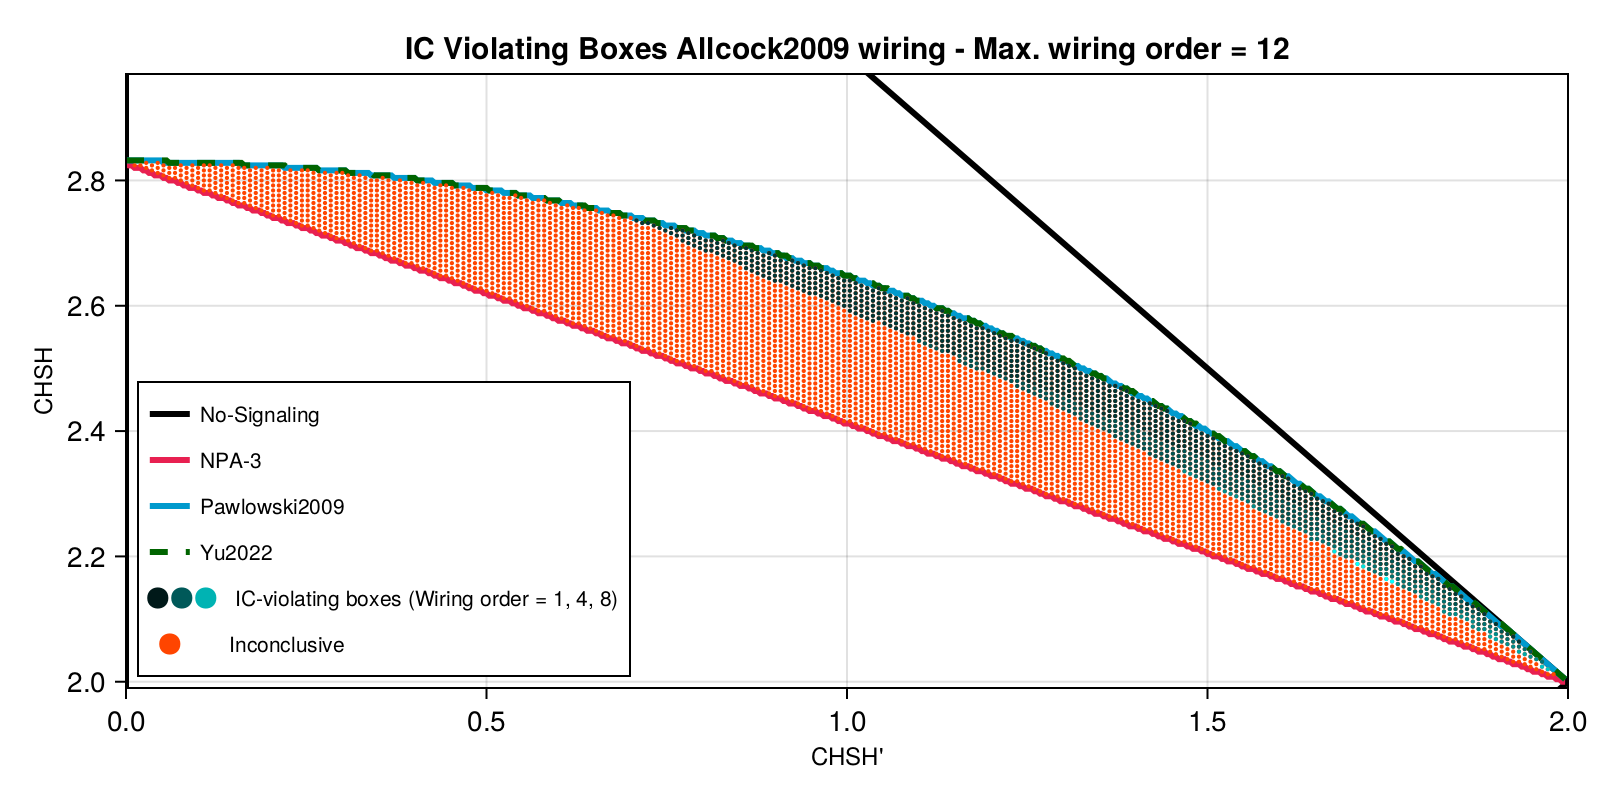

In [16]:
using LaTeXStrings

function plot_Uniform_Wirings_Slice_Search(data::Dict; markersize::Real=4, big::Bool=true)

    # Initialize figure and colors:
    non_violating_color = :orangered
    unwired_IC_color = :deepskyblue3
    unwired_RedundantIC_color = :darkgreen
    NS_color = :black
    Quantum_color = "#e82051"
    
    fig = Figure(; size=(800,400))
    
    fig_title = """IC Violating Boxes Allcock2009 wiring - Max. wiring order = $(data["max_wiring_order"])"""
    ax = Axis(fig[1, 1]; xlabel = "CHSH'", ylabel = "CHSH", xlabelsize=(big ? 12 : 10), ylabelsize=(big ? 12 : 10),
            titlevisible=true, titlesize=(big ? 15 : 12.5), title =fig_title,
            )
    xlims!(ax, min(map(first, data["ns_extremes"])...), max(map(first, data["ns_extremes"])...))
    #ylims!(ax, min(y1, y2, y3), max(y1, y2, y3))
    #ylims!(ax, 1.5, 4)
    ylims!(ax, 1.99, 2.1*sqrt(2))

    
    #Draw the Boundary of the NS set:
    ns_boundary_line = lines!(ax, [map(first, data["ns_extremes"])..., data["ns_extremes"][1][1]], [map(last, data["ns_extremes"])..., data["ns_extremes"][1][end]]; color=NS_color, linewidth=3)

    #Draw the Quantum boundary:
    quantum_boundary_line = lines!(ax, data["quantum_secondary_scores"], data["quantum_primary_scores"]; color=Quantum_color, linewidth=3)

    #Draw the unwired IC boundary:
    unwired_IC_boundary_line = lines!(ax, data["unwired_IC_secondary_scores"], data["unwired_IC_primary_scores"]; color=unwired_IC_color, linewidth=3)
    
    #Draw the unwired Redundant-IC boundary:
    unwired_RedundantIC_boundary_line = lines!(ax, data["unwired_Redundant_IC_secondary_scores"], data["unwired_Redundant_IC_primary_scores"]; color=unwired_RedundantIC_color, linewidth=3, linestyle=:dash)

    #middle_points_IC_Q = data["quantum_primary_scores"][1:end-(length(data["quantum_secondary_scores"])-length(data["unwired_IC_secondary_scores"]))] + (data["unwired_IC_primary_scores"] - data["quantum_primary_scores"][1:end-(length(data["quantum_secondary_scores"])-length(data["unwired_IC_secondary_scores"]))]) ./ 2 
    #data["mode"] != :collect_plot_data && (lines!(ax, data["unwired_IC_secondary_scores"], middle_points_IC_Q; color="black", linestyle=:dash, linewidth=1.5))
    
    draw_assessed_points = true
    if draw_assessed_points
        #Unpack vector of tuples (x,y), data["assessed_points"]
        x_vec, y_vec = map(x->x[1], data["assessed_points"]), map(x->x[2], data["assessed_points"])
        scatter!(ax, x_vec, y_vec; color=non_violating_color, markersize=3)
    end

    # Now we draw the wired IC violating boxes:
    max_wiring_order = data["max_wiring_order"]
    if draw_assessed_points
        #max_wiring_order = data["max_wiring_order"]
        max_wiring_order = maximum([violating_wiring.wiring_order for violating_wiring in data["IC_violating_wirings"]])
        for violating_wiring in data["IC_violating_wirings"]
            (;initial_box, wired_box, wiring_types, wiring_params, wiring_order) = violating_wiring

            initial_coordinates = CHSHprime_score(initial_box), CHSH_score(initial_box)
            color_point = RGBf(0, 0.1*(1-wiring_order/max_wiring_order)+1*(wiring_order/max_wiring_order), 0.1*(1-wiring_order/max_wiring_order)+1*(wiring_order/max_wiring_order))
            scatter!(ax, [initial_coordinates[1]], [initial_coordinates[2]]; color=color_point, markersize=3)
        end
    end


    #Misc. plot settings:
        
    legend_visible = true
    legend_visible ? (axislegend(ax, [ns_boundary_line, 
                                    quantum_boundary_line, 
                                    unwired_IC_boundary_line, 
                                    unwired_RedundantIC_boundary_line, 
                                    [MarkerElement(color =RGBf(0, 0.1, 0.1), marker=:circle, markersize = 15, points = Point2f[(0.2, 0.5)]), 
                                    MarkerElement(color =RGBf(0, 0.7/2, 0.7/2), marker=:circle, markersize = 15, points = Point2f[(0.8, 0.5)]), 
                                    MarkerElement(color =RGBf(0, 0.7, 0.7), marker=:circle, markersize = 15, points = Point2f[(1.4, 0.5)]),
                                    ], 
                                    MarkerElement(color =:orangered, marker=:circle, markersize = 15),
                                    ],
                                ["No-Signaling","NPA-3", "Pawlowski2009", "Yu2022", 
                                "      IC-violating boxes (Wiring order = 1, $(Int(floor(max_wiring_order/2))), $max_wiring_order)",
                                "     Inconclusive"
                                ];
                                position = :lb, labelsize = (big ? 10.5 : 9.5) )) : nothing
    
    #mkpath(plotsdir("WiringsSliceSearch"))
    save(plotsdir("WiringsSliceSearch", "Allcock2009_Wiring_Slice_PL0101_Search.png"), fig)
    fig # equiv. to plt.show()
end

plot_Uniform_Wirings_Slice_Search(data_output ;markersize=10,)